# Исследование данных о продажах игр, об оценках пользователей и экспертов, о жанрах и платформах.

**Описание проекта**

ИИнтернет-магазин продаёт по всему миру компьютерные игры. Из открытых источников, используя исторические данные (до 2016 года) о продажах игр, оценки пользователей и экспертов, жанры и платформы нужно выявить определяющие успешность игры закономерности, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Описание данных**

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
Данные за 2016 год могут быть неполными.

**Цели и задачи проекта**

1. Выявить определяющие успешность игры закономерности.
2. Проверка гипотезы. Н0: Средние пользовательские рейтинги трех самых популярных платформ в мире одинаковые, Н1 -Средние пользовательские рейтинги трех самых популярных платформ в мире не равны;
3. Проверка гипотезы. Н0: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны. Н1: Средние пользовательские рейтинги жанров Action и Sports не равны.

**Ход исследования**

- Обзор данных
- Предобработка данных
- Исследовательский анализ данных
- Портрет пользователя каждого региона
- Проверка гипотез.

## Содержание
1. [Чтение данных](#read_data)
2. [Подготовка данных](#pre_data)
3. [Исследовательский анализ](#analysis)
4. [Портрет пользователя каждого региона](#na_eu_jp)
5. [Проверка гипотез](#hypothesis)
6. [Общий вывод](#summary)

### Открываем файл с данными и изучаем общую информацию. <a name="read_data"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

import warnings
warnings.filterwarnings('ignore')

In [2]:
try:
    data = pd.read_csv('games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

In [3]:
data.head(10) # выводим первые десять строк

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Подготовка данных. <a name="pre_data"></a>

**Название столбцов приведем к нижнему регистру.**

**Тип данных в столбце `год выпуска` преобразовывать в тип `datatime` нет смысла, постольку это только год, к тому же в этом столбце есть пропуски, поэтому оставляем тип вещественный.**

**Тип столбца `оценка пользователей` - строковый. Сначала выведем уникальные значения, чтобы посмотреть есть ли там не числовые обозначения. Далее данные в столбце приведем к вещественному типу, для возможности дальнейшего исследования по этому параметру.**

In [5]:
data['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

**Видим одно не числовое обозначение: `tbd`**

> *TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято.*

**Скорее всего пользователь начал заполнять анкету, и не отправил итог, соответственно оценка не определена. Поэтому лучше заменить эти значения на NaN, для дальнейшего перевода к вещественному типу.**

In [6]:
data.loc[data['User_Score'] == 'tbd', 'User_Score'] = 'NaN'

In [7]:
data.columns = data.columns.str.lower()
data[['critic_score', 'user_score']] = data[['critic_score', 'user_score']].astype('float16')

In [8]:
data.info() # проверяем произведенные замены типов данных.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float16
 9   user_score       7590 non-null   float16
 10  rating           9949 non-null   object 
dtypes: float16(2), float64(5), object(4)
memory usage: 1.2+ MB


**Выводим количество пропущенных значений для каждого столбца.**

In [9]:
data.isna().sum() 

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [10]:
data.isna().sum()/len(data)*100

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         54.591684
rating             40.478612
dtype: float64

In [11]:
data['rating'].value_counts(dropna=False)

NaN     6766
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

**Пропущенных значений в столбцах с названиями игры и жанра всего по два. Их можно удалить, т.к.к на исследование они не повлияют.**

**Пропуски в столбце `год выпуска` могут быть вызваны тех.ошибками. Они занимают малый процент от всего датасета (1,6%). В данном случае их можно удалить, т.к. их остутствие не повлияет на результат исследования.**

**Пропуски в столбце рейтинг от организации ESRB (англ. Entertainment Software Rating Board - эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию), заменим на значения «RP» («Rating Pending») -**
> *«Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.*

**Скорее всего причина такого большого количества пропусков >40% в столбце с рейтингами от организации ESRB, вызвано тем, что здесь собранны данные о продажах игр в мире. А рейтинги от Американской организации ESRB присваивают только для компьютерных игр и другого развлекательного программного обеспечения в США и Канаде, а в Японии есть своё рейтинговое агентство (CERO). Соответственно, для игр других стран этот рейтинг отсутствует.И более 50% отсутстующих значений в столбцах с оценками экспертов и с оценками пользователей возможно вызвано тем, что данные представлены начиная с 1980 года и на заре появления игр они либо не оценивались вовсе, либо эти оценки не фиксировались. Или оценочные шкалы отличались от шкал с следующих временных периодах. Заменить чем то будет не корректно, т.к. они во-первых занимают большой процент от всех значений и во-вторых зависят от многих параметров (игры, платформы, года выпуска). Оставим пока эти значения пустыми.**

In [12]:
data = data.dropna(subset=['year_of_release'])
data['rating'] = data['rating'].fillna('RP')

In [13]:
data = data.dropna(subset=['name'])
data = data.dropna(subset=['genre'])

In [14]:
np.shape(data)

(16444, 11)

In [15]:
data.isna().sum() #проверяем заполненность пропущенных значений.

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

Дополнительно переведем данные в столбце `год выпуска` в целочисленный тип, т.к. избавились от пустых значений в нем.

In [16]:
data['year_of_release'] = data['year_of_release'].astype('int16')

**Посчитаем суммарные продажи во всех регионах**

In [17]:
df_sales = data.agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum', 'other_sales':'sum'})
df_sales

na_sales       4341.42
eu_sales       2399.68
jp_sales       1290.64
other_sales     782.63
dtype: float64

In [18]:
df_sales.sum()

8814.369999999999

In [19]:
df_sales/df_sales.sum()

na_sales       0.492539
eu_sales       0.272246
jp_sales       0.146425
other_sales    0.088790
dtype: float64

**На Северную Америку приходится 49% от всего объема продаж. На долю Европы - 27% проданных копий. В Японии 14 % проданных копий от всего объема. И чуть меньше 9 % от всего объема продаж приходится на другие страны.**

**Также посчитаем суммарные продажи во всех регионах по жанрам.**

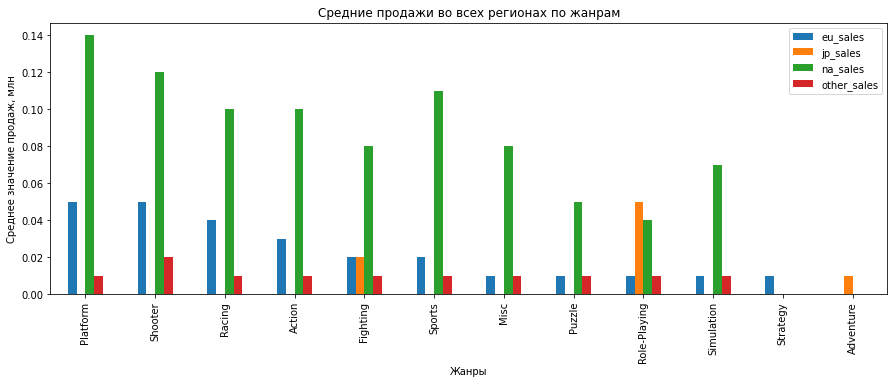

In [20]:
df_sales_genre = data.pivot_table(index='genre', values = ['na_sales','eu_sales','jp_sales', 'other_sales'], aggfunc='median').sort_values(by='eu_sales', ascending=False)
df_sales_genre.plot(kind='bar', title='Средние продажи во всех регионах по жанрам', figsize=(15,5))
plt.xlabel('Жанры')
plt.ylabel('Среднее значение продаж, млн')
plt.show()

**За все время исследования самые популярные жанры игр в Северной Америке и в Европе - `Platform`, `Shooter` и `Sports`. 
В Японии самый популярный жанр - `Role-Playing`.**

### Исследовательский анализ данных. <a name="analysis"></a>

Посмотрим сколько игр выпускалось в разные годы.

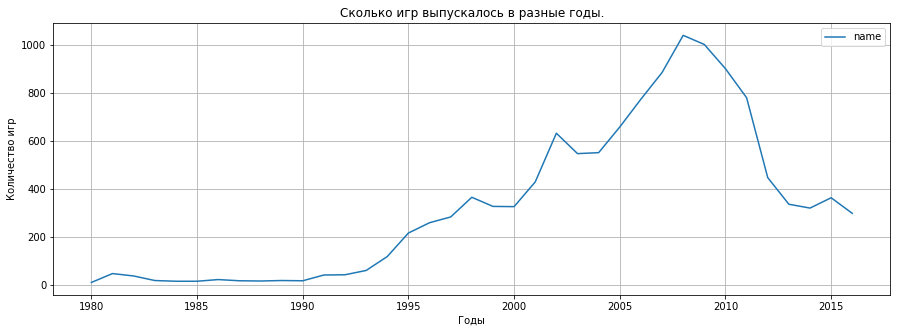

In [21]:
#Одна и та же игра могла быть выпущена на нескольких платформах. Удалим дубли по комбинации название+год.
df_name_true = data.drop_duplicates(subset = ['name','year_of_release'])

df_sales_y = df_name_true.pivot_table(index='year_of_release', values = 'name', aggfunc='count')
df_sales_y.plot(title='Сколько игр выпускалось в разные годы.', grid=True, figsize=(15,5))
plt.xlabel('Годы')
plt.ylabel('Количество игр')
plt.show()

**С 1980 по 1990 годы количество выпущенных игр ничтожно мало. Начиная с 1990 года начинается плавный рост количества выпускаемых игр. C 1993 начало резко роста. Пик приходится на 2008-2009 годы, в этот период выпускали более 1400 игр в год. После наблюдается столь же резкое снижение количества выпускаемых игр, вплоть до 2013 года. Далее идет относительно стабильный выпуск игр на уровне около 600 игр в год. Это может быть связано с тем, что появились смартфоны, с соответствующими игрушками на их базе. Еще с развитием информационных технологий был и рост количества выпускаемых компьютерных игр. В 2008 году наступил мировой экономический кризис, и как следствие выпуск новых компьютерных игр начал резко снижаться. И к 2013 году ситуация начала стабилизироваться.**

**Соответственно, далее в исследованиях мы не будем учитавать восемидесятые годы, т.к. эти данные не повлияют на результаты исследований.**

In [22]:
data = data.query('1990 <= year_of_release')

**Исследуем зависимость продаж от платформ.**

Создадим столбец с общими продажами по всем регионам. Постморим уникальные значения платформ для выявления неявных дубликатов.

In [23]:
data['all_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis='columns') 
data['platform'].unique()

array(['Wii', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA', 'PS4',
       '3DS', 'N64', 'PS', 'XB', 'PC', 'PSP', 'XOne', 'WiiU', 'GC', 'GEN',
       'NES', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16', '3DO', 'GG',
       'PCFX'], dtype=object)

Смотрим на количества проданных копий по платформам за весь период.

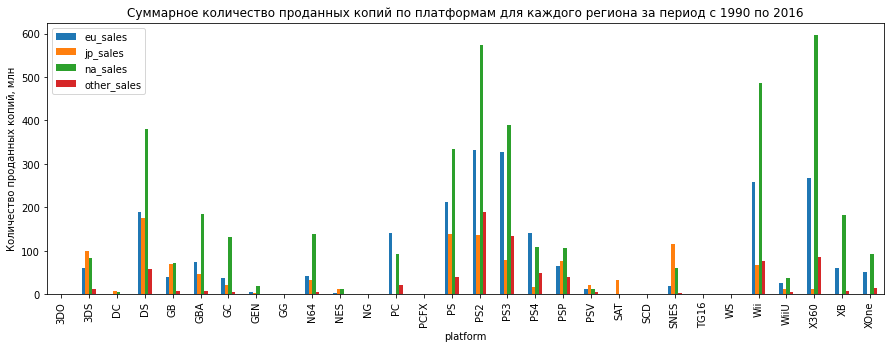

In [24]:
df_platform = data.pivot_table(index='platform', values = ['na_sales','eu_sales','jp_sales', 'other_sales'], aggfunc='sum')
df_platform.plot(kind='bar', title='Суммарное количество проданных копий по платформам для каждого региона за период с 1990 по 2016', figsize=(15,5))
plt.ylabel('Количество проданных копий, млн')
plt.show()

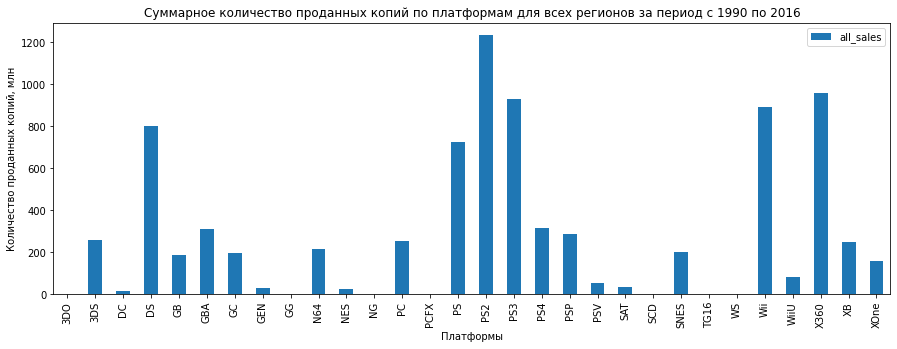

In [25]:
df_sub_platform = data.pivot_table(index='platform', values = 'all_sales', aggfunc='sum')
df_sub_platform.plot(kind='bar', title='Суммарное количество проданных копий по платформам для всех регионов за период с 1990 по 2016', figsize=(15,5))
plt.ylabel('Количество проданных копий, млн')
plt.xlabel('Платформы')
plt.show()

**Из графика видно что только некоторые платформы из представленных пользуются особой популярностью. Выберем платформы с наибольшими суммарными продажами.**

In [26]:
df1 = data.groupby('platform').agg({'all_sales': 'sum'})
df1 = df1.query('all_sales >= 400')
df1.sort_values(by='all_sales', ascending=False)

,all_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS,727.58


**Построим графики распределения платформ с наибольшими суммарными продажами по годам.**

In [27]:
tmp = data.pivot_table(index='platform', values='all_sales', aggfunc= 'sum').sort_values('all_sales', ascending=False)

platforms = tmp.index[:6].tolist()

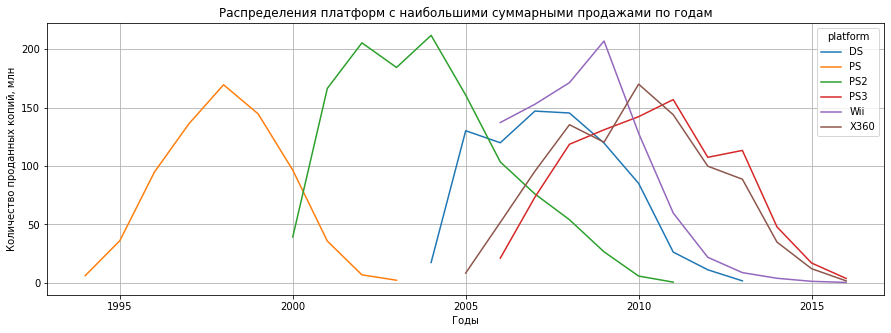

In [28]:
data1 = data.query('platform == @platforms').pivot_table(index='year_of_release', columns='platform', values = 'all_sales', aggfunc='sum')
data1.plot(title = 'Распределения платформ с наибольшими суммарными продажами по годам', grid=True, figsize=(15,5))
plt.xlabel('Годы')
plt.ylabel('Количество проданных копий, млн')
plt.show()


**Дополнительно построим распределение всех платформ по годам, с помощью диаграммы рассеяния.**

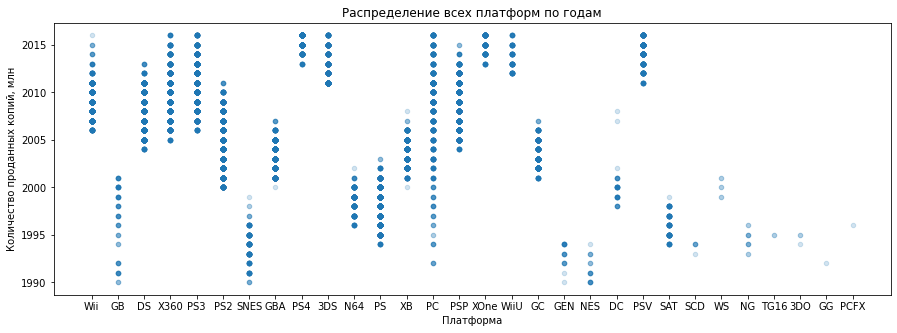

In [29]:
data.plot(x='platform', y='year_of_release', title = 'Распределение всех платформ по годам', kind='scatter', alpha=0.2, figsize=(15, 5))
plt.ylabel('Количество проданных копий, млн')
plt.xlabel('Платформа')
plt.show()

<div style='border:solid blue 3px; padding: 20px'>
    
**Вывод:**

**Судя по графикам характерный срок "жизни" платформы 5 - 10 лет. И только одна платформа `PC` имеет популярность на протяжении почти всего периода исследования,хотя и не входит в топ платформ с наибольшими суммарными продажами.**


**Следовательно, для прогнозирования на следующий 2017 год построим график распределение платформ за период с 2013 года, поскольку:**
- **платформы, используемые в более ранние периоды уже не актуальны;**
- **приблизительно до 2013 года наблюдалось резкое снижение выпускаемых игр, а далее ситуация стабилизировалась.**

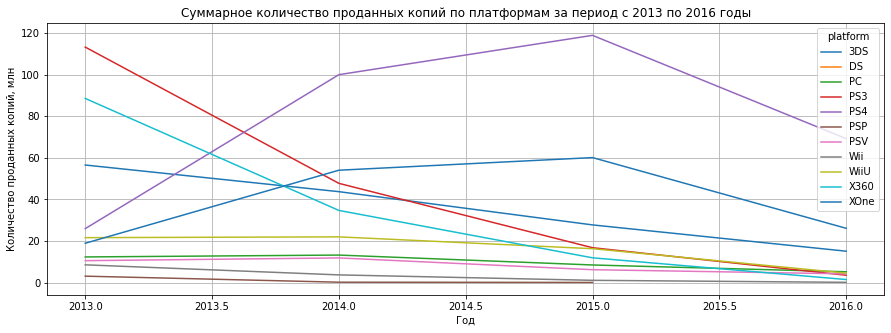

In [30]:
data_2013 = data.query('year_of_release >=2013.0')

data_final_platforms = data_2013.pivot_table(index='year_of_release', columns='platform', values = 'all_sales', aggfunc='sum')
data_final_platforms.plot(title='Суммарное количество проданных копий по платформам за период с 2013 по 2016 годы', grid=True, figsize=(15,5))
plt.xlabel('Год')
plt.ylabel('Количество проданных копий, млн')
plt.show()

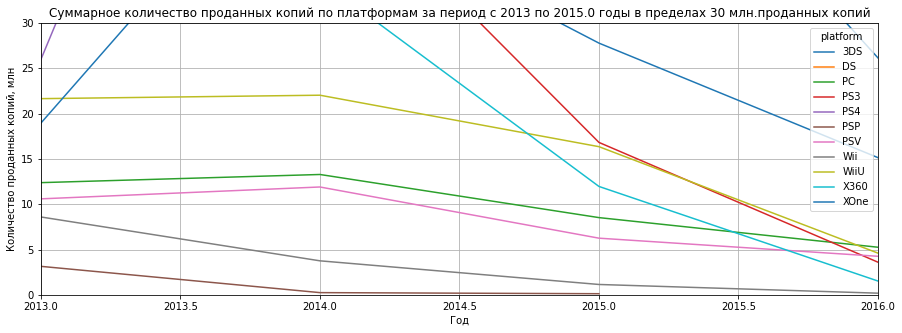

In [31]:
data_final_platforms = data_2013.pivot_table(index='year_of_release', columns='platform', values = 'all_sales', aggfunc='sum')
data_final_platforms.plot(title='Суммарное количество проданных копий по платформам за период с 2013 по 2015.0 годы в пределах 30 млн.проданных копий', \
                          xlim=(2013.0, 2016.0), ylim=(0, 30), grid=True, figsize=(15,5))
plt.xlabel('Год')
plt.ylabel('Количество проданных копий, млн')
plt.show()

In [32]:
data_final_platforms

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


In [33]:
data_final_platforms = data_2013.groupby('platform').agg({'all_sales': 'sum'})
data_final_platforms.sort_values(by='all_sales', ascending=False)

,all_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


Графики скошены вниз из-за не полных данных за 2016 год. Но не учитывать их нельзя. По ним смотрим степень динамики.

<div style='border:solid blue 3px; padding: 20px'>
    
**Вывод:**
    
**С 2013 года по неполный 2016 год лидер по продажам среди платформ `PS4` (более 314 млн. проданных копий), причем с каждым годом количество продаж увеличивается. На втором месте в лидерах продаж (в рассматриваемом периоде) платформа `PS3`, однако ее позиции стремительно снижаются. Также в секторе больших объемов продаж, наблюдается рост продаж платформы `XOne`, а вот продажи платформы `X360` снижаются. Есть небольшое снижение продаж платформ `3DS` и `WiiU`, однако они по прежнему остаются в секторе с наибольшими суммарными продажами.**

**Выпуск платформы `PSP` прекратился с 2015 года.**    
    
**Среди не больших объемов продаж остаются стабильньно востребованными платформы `PC` и `PSV`.**

**К потенциально прибыльным платформам можно отнести:**
- `PS4`
- `XOne`
- `3DS`
- `WiiU`
- `PC`
- `PSV`   

**Строим диаграмму размаха по глобальным продажам игр в разбивке по платформам.**


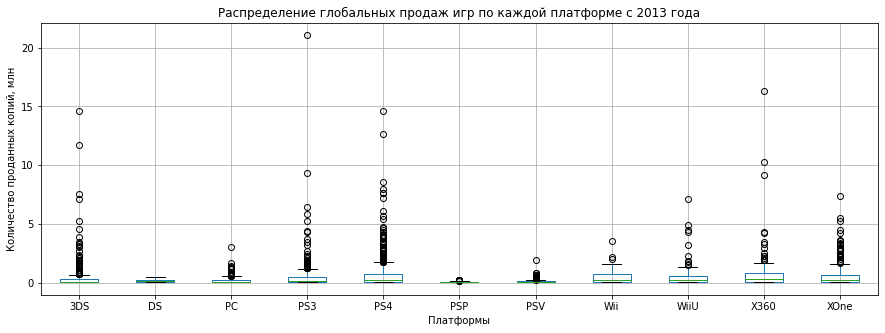

In [34]:
data_sales_platform = data_2013.pivot_table(index='name', columns = 'platform', values = 'all_sales', aggfunc='sum')
data_sales_platform.boxplot(figsize=(15,5))
plt.ylabel('Количество проданных копий, млн')
plt.xlabel('Платформы')
plt.title('Распределение глобальных продаж игр по каждой платформе с 2013 года')
plt.show()

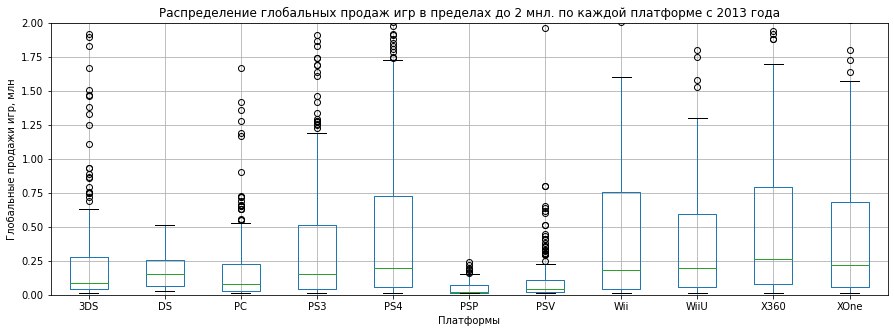

In [35]:
# без выбросов
data_sales_platform = data_2013.pivot_table(index='name', columns = 'platform', values = 'all_sales', aggfunc='sum')
data_sales_platform.boxplot(figsize=(15,5))
plt.ylim(0, 2)
plt.ylabel('Глобальные продажи игр, млн')
plt.xlabel('Платформы')
plt.title('Распределение глобальных продаж игр в пределах до 2 мнл. по каждой платформе с 2013 года')
plt.show()

**Плотность распределения глобальных продаж по платформам не равномерна. 75% элементов выборки по каждой платформе не превышает 0,75 млн.проданных копий. Верхняя граница нормальных значений по всем платформам не превышает 1,75млн. проданных копий. Основная масса выбросов находится в пределах до 7 млн. и единичные выбросы до 20 млн. Это характерно для популярных платформ с высокими продажами. Максимальное значение медианы у платформы `X360` ~ 0,26 млн. Все "ящики" вытянуты наверх и верхний ус длинее, это означает что средние значения будут больше медианных, т.е. по каждой платформе есть отдельно взятые продажи игр, которые определяют высокую прибыльность той или иной платформы.**


**Посмотрим как влияют на продажи внутри одной популярной платформы `XOne` отзывы критиков и пользователей.**

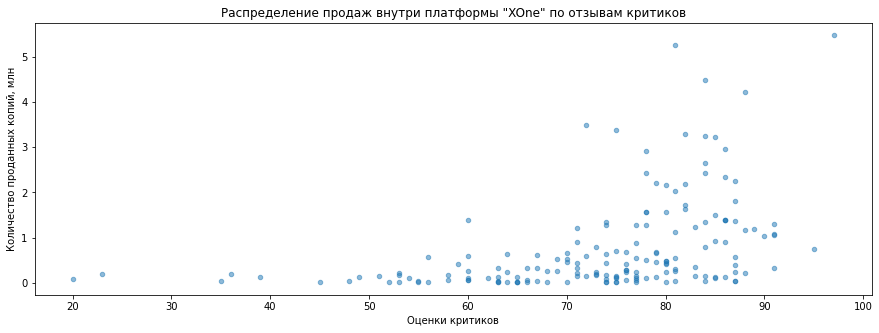

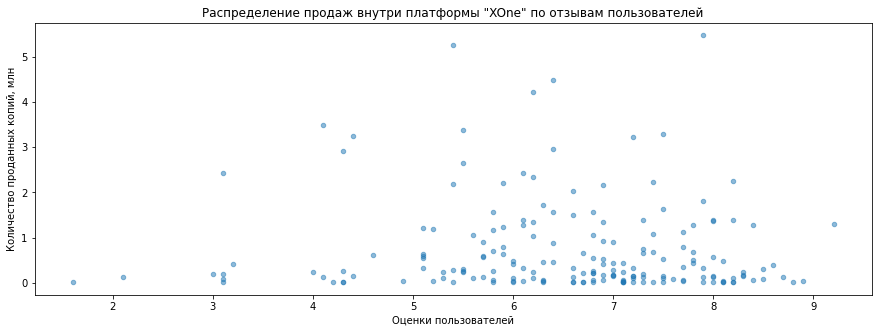

In [36]:
data_2013.query("platform == 'XOne'").plot(x='critic_score', y='all_sales', kind='scatter', alpha=0.5, figsize=(15, 5))
plt.title('Распределение продаж внутри платформы "XOne" по отзывам критиков')
plt.ylabel('Количество проданных копий, млн')
plt.xlabel('Оценки критиков')
plt.show()

data_2013.query("platform == 'XOne'").plot(x='user_score', y='all_sales', kind='scatter', alpha=0.5, figsize=(15, 5))
plt.title('Распределение продаж внутри платформы "XOne" по отзывам пользователей')
plt.ylabel('Количество проданных копий, млн')
plt.xlabel('Оценки пользователей')
plt.show()

In [37]:
data_xone = data_2013.query("platform == 'XOne'") #срез датасета по одной платформе "XOne".
round(data_xone['critic_score'].corr(data_xone['all_sales']), 4) #вычисляем коэффициент корреляции в рамках одной популярной платформы.

0.417

In [38]:
data_psp = data_2013.query("platform == ['PSV', 'PSP', 'PC', 'DS']") #срез даиасета по одной платформе "PSV".
round(data_psp['critic_score'].corr(data_psp['all_sales']), 4) #вычисляем коэффициент корреляции в рамках менее популярной платформы.

0.2103

**Между отзывами и продажами наблюдается прямая зависимость, слабой степени выраженности. Чем больше продаж, тем больше отзывов от пользователей и критиков. Для популярных платформ эта зависимость сильнее выражена, чем на менее востребованных платформах. Однако эта разница не столь значитальна.**

**Для других платформ будут наблюдатся те же прямые зависимости между отзывами и продажами. Коэффициенты корреляции для менее востребованных платформ меньше, чем у популярных. Т.е. для них степень зависимости между продажами и оценками ниже, чем для платформ с высокими продажами. Степень прямой зависимости популярных платформ около 0.4. Степень прямой зависимости менее популярных платформ около 0.2. Иными словами, чуть слабее выраженна зависимость между отзывами и продажами.**

**Cмотрим общее распределение игр по жанрам.**

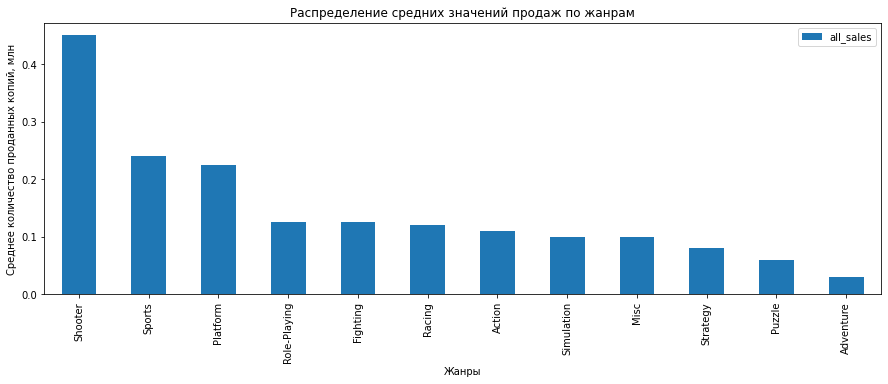

In [39]:
data_2013_genre = data_2013.pivot_table(index='genre', values = 'all_sales', aggfunc='median').sort_values(by='all_sales', ascending=False)
data_2013_genre.plot(kind='bar', figsize=(15,5))
plt.title('Распределение средних значений продаж по жанрам')
plt.ylabel('Среднее количество проданных копий, млн')
plt.xlabel('Жанры')
plt.show()

**Востребованность разных жанров очень не равномерна. Самый прибыльный жанр игр является `Shooter`. На втором месте с большим отрывом `Sports`. Разница средних значений продаж более популярных жанров отличается в разы от менее популярных. Жанр `Adventure` с самими низкими продажами.**

### Портрет пользователя каждого региона. <a name="na_eu_jp"></a>

* **Самые популярные платформы в Северной Америки, Европе и Японии.**

In [40]:
# создаем сводную таблицу с суммами продаж по каждому региону в разбивке по платформам.

data_2013_pl = data_2013.pivot_table(index='platform', values = ['na_sales','eu_sales','jp_sales', 'other_sales', 'all_sales'],\
                                     aggfunc='sum')

In [41]:
# считаем доли продаж по каждому региону от общего количества в процентах.

data_2013_na = (data_2013_pl['na_sales']/data_2013_pl['all_sales']*100).sort_values(ascending=False).round(2)
data_2013_eu = (data_2013_pl['eu_sales']/data_2013_pl['all_sales']*100).sort_values(ascending=False).round(2)
data_2013_jp = (data_2013_pl['jp_sales']/data_2013_pl['all_sales']*100).sort_values(ascending=False).round(2)

In [42]:
#объединяем посчитанные доли продаж

data_2013_sub = data_2013_pl.join([data_2013_na, data_2013_eu, data_2013_jp]) 
data_2013_sub

,all_sales,eu_sales,jp_sales,na_sales,other_sales,0,1,2
platform,,,,,,,,
3DS,143.25,30.96,67.81,38.20,6.28,26.67,21.61,47.34
DS,1.54,0.85,0.00,0.57,0.12,37.01,55.19,0.00
PC,39.43,25.36,0.00,11.11,2.96,28.18,64.32,0.00
PS3,181.43,67.81,23.35,63.50,26.77,35.00,37.38,12.87
PS4,314.14,141.09,15.96,108.74,48.35,34.62,44.91,5.08
PSP,3.50,0.17,3.29,0.00,0.04,0.00,4.86,94.00
PSV,32.99,6.10,18.59,5.04,3.26,15.28,18.49,56.35
Wii,13.66,5.93,0.05,6.56,1.12,48.02,43.41,0.37
WiiU,64.63,19.85,10.88,29.21,4.69,45.20,30.71,16.83


In [43]:
#переименовываем названия столбцов для посчитанных долей

data_2013_sub = data_2013_sub.rename(columns={0:'percent_na', 1:'percent_eu', 2:'percent_jp'})
data_2013_sub

,all_sales,eu_sales,jp_sales,na_sales,other_sales,percent_na,percent_eu,percent_jp
platform,,,,,,,,
3DS,143.25,30.96,67.81,38.20,6.28,26.67,21.61,47.34
DS,1.54,0.85,0.00,0.57,0.12,37.01,55.19,0.00
PC,39.43,25.36,0.00,11.11,2.96,28.18,64.32,0.00
PS3,181.43,67.81,23.35,63.50,26.77,35.00,37.38,12.87
PS4,314.14,141.09,15.96,108.74,48.35,34.62,44.91,5.08
PSP,3.50,0.17,3.29,0.00,0.04,0.00,4.86,94.00
PSV,32.99,6.10,18.59,5.04,3.26,15.28,18.49,56.35
Wii,13.66,5.93,0.05,6.56,1.12,48.02,43.41,0.37
WiiU,64.63,19.85,10.88,29.21,4.69,45.20,30.71,16.83


In [44]:
#задаем список нужных нам столбцов
percents = ['percent_na', 'percent_eu','percent_jp'] 

#записываем датафрейм только с долями продаж
data_2013_na_eu_jp = pd.DataFrame(data = data_2013_sub, columns = percents) 

#выводим полученный датафрем по убыванию значений столбца "percent_jp"
data_2013_na_eu_jp.sort_values(by = 'percent_jp', ascending=False)

,percent_na,percent_eu,percent_jp
platform,,,
PSP,0.00,4.86,94.00
PSV,15.28,18.49,56.35
3DS,26.67,21.61,47.34
WiiU,45.20,30.71,16.83
PS3,35.00,37.38,12.87
PS4,34.62,44.91,5.08
Wii,48.02,43.41,0.37
X360,59.69,31.08,0.37
XOne,58.45,32.38,0.21


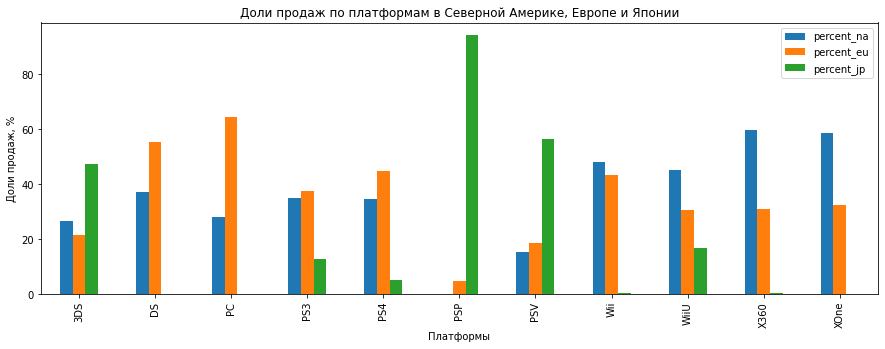

In [45]:
data_2013_na_eu_jp.plot(kind='bar', title = 'Доли продаж по платформам в Северной Америке, Европе и Японии', figsize=(15, 5))
plt.ylabel('Доли продаж, %')
plt.xlabel('Платформы')
plt.show()

<div style='border:solid blue 3px; padding: 20px'>
    
**Вывод:**

**Топ 5 самых популярных платформ в Северной америке:** 
- `X360` - 59 % от суммарного объема продаж во всех регионах
- `XOne` - 58 % от суммарного объема продаж во всех регионах
- `Wii`  - 48 % от суммарного объема продаж во всех регионах
- `WiiU` - 45 % от суммарного объема продаж во всех регионах
- `DS`   - 37 % от суммарного объема продаж во всех регионах

**Топ 5 самых популярных платформ в Европе:**
- `PC`  - 64 % от суммарного объема продаж во всех регионах
- `DS`  - 55 % от суммарного объема продаж во всех регионах
- `PS4` - 44 % от суммарного объема продаж во всех регионах
- `Wii` - 43 % от суммарного объема продаж во всех регионах
- `PS3` - 37 % от суммарного объема продаж во всех регионах

**Топ 5 самых популярных платформ в Японии:** 
- `PSP` - 94 % от суммарного объема продаж во всех регионах
- `PSV` - 56 % от суммарного объема продаж во всех регионах
- `3DS` - 47 % от суммарного объема продаж во всех регионах
- `WiiU`- 16 % от суммарного объема продаж во всех регионах
- `PS3` - 12 % от суммарного объема продаж во всех регионах

**Примечательно, что одна платформа `PSP` используется почти только в Японии, и совсем малая ее доля в Европе.**

**В Северной Америке и Европе относительно равномерно используются 10 платформ. А в Японии задействованы только 6 платформ, причем `PSP` с большим отрывом от остальных (выпуск которой прекратился с 2015 года). За ней следуют платформы `PSV` и `3DS`.**

* **Самые популярные жанры в Северной Америке, Европе и Японии.**

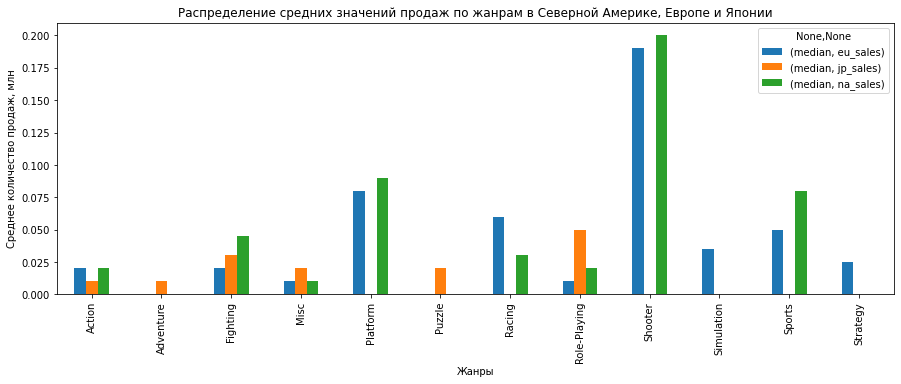

In [46]:
# создаем сводную по средним значенем продаж в Северной Америке, Европе и Японии и выводим график

data_2013_genres = data_2013.pivot_table(index='genre', values=['na_sales','eu_sales','jp_sales'], \
                                         aggfunc=['median']).plot(kind='bar', figsize=(15,5))
plt.title('Распределение средних значений продаж по жанрам в Северной Америке, Европе и Японии')
plt.ylabel('Среднее количество продаж, млн')
plt.xlabel('Жанры')
plt.show()


<div style='border:solid blue 3px; padding: 20px'>
    
**Вывод:**   
    
**В Северной Америке и Европе предпочтения по жанрам очень схожи. Здесь наиболее востребован жанр `Shoter`, на втором и третьем месте `Platform` и `Sports` соответственно.**


**В Японии наибольший доход приносят жанры `Role-Playing` и `Fighting`.**


* **Влияние рейтинга ESRB на продажи в Северной Америке, Европе и Японии.**

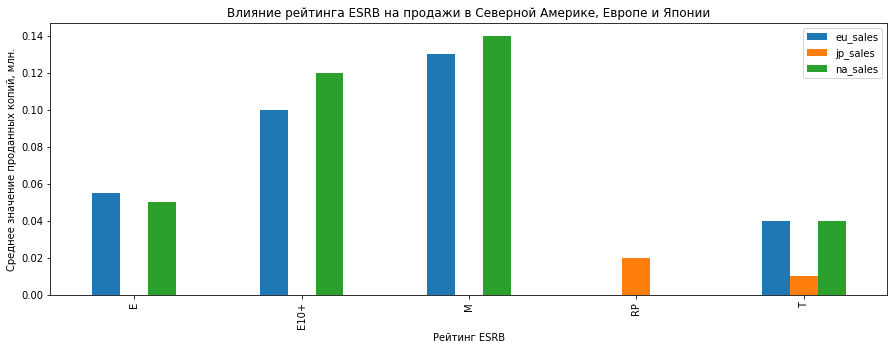

In [47]:
data_2013_rating = data_2013.pivot_table(index = 'rating', values=['na_sales','eu_sales','jp_sales'], aggfunc='median')
data_2013_rating.plot(kind='bar', title='Влияние рейтинга ESRB на продажи в Северной Америке, Европе и Японии', figsize=(15,5))
plt.ylabel('Среднее значение проданных копий, млн.')
plt.xlabel('Рейтинг ESRB')
plt.show()

<div style='border:solid blue 3px; padding: 20px'>
    
**Вывод:**

**Среднее количество продаж по рейтингам ESRB в Северной Америки и Европе схожи. Больше всего продаж игр с рейтингом ESRB - "М" (для взрослых) и с ретингом  ESRB - "E10+" (от 10 лет и старше), на третьем месте по популярности с рейтингом - "E" (для всех).**

**В Японии больше всего продаж игр с рейтингом "RP" (рейтинг ожидается), т.е. рейтинг не определен. А значит, сказать какая в Японии востребованная возрастная категория для игр сказать не можем. Эти рейтинги от Американской организации ESRB присваивают только для компьютерных игр и другого развлекательного программного обеспечения в США и Канаде. Соответственно, для игр других стран этот рейтинг отсутствует. Логично предположить, что в Японии востребованы игры родного производства.** 

### Проверка гипотез. <a name="hypothesis"></a>

**1. Гипотеза: Средние пользовательские рейтинги платформ `X360`, `XOne`, `PC` одинаковые.**

Проверку гипотезы выполним с помощью метода сравнения среднего двух генеральных совокупностей по взятым из них выборкам.

Нулевая гипотеза (H0) - Средние пользовательские рейтинги платформ `X360`, `XOne`, `PC` равны. Сравним сначала пользовательские оценки двух из заданных трех платформ. Если они окажутся одинаковыми, то далее сравним одну из них с третьей.

Альтернативная гипотеза (H1) - Средние пользовательские рейтинги платформ `X360`, `XOne`, `PC` не равны.

In [48]:
data_2013 = data_2013.dropna(subset=['user_score']) #удаляем пустые значения в столбце с оценками пользователей.

In [49]:
sample1 = data_2013.loc[data_2013['platform'] == 'X360', 'user_score']
sample2 = data_2013.loc[data_2013['platform'] == 'XOne', 'user_score']
sample3 = data_2013.loc[data_2013['platform'] == 'PC', 'user_score']

results = st.ttest_ind(sample1, sample2, equal_var = False)
results2 = st.ttest_ind(sample1, sample3, equal_var = False)

alpha = 0.05 #уровень статистической значимости. Если p-value окажется меньше него, то отвергнем Н0.

print('Значение p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


Значение p-value: 0.001891101994743131
Отвергаем нулевую гипотезу


**Значение p-value меньше статистической значимости.** 
**Вероятность случайно получить различие между средними пользовательскими рейтингами двух платформ равно 0,2%. Это явно слишком маленькая вероятность, чтобы делать вывод о равенстве средних оценок этих двух платформ. H0 отвергаем.** 

**2. Гипотеза: Средние пользовательские рейтинги жанров `Action` и `Sports` разные.**

Проверку гипотезы выполним с помощью метода сравнения среднего двух генеральных совокупностей по взятым из них выборкам.

H0 - Средние пользовательские рейтинги жанров `Action` и `Sports` равны.

H1 - Средние пользовательские рейтинги жанров `Action` и `Sports` не равны.

In [50]:
action = data_2013.loc[data_2013['genre'] == 'Action', 'user_score']
sports = data_2013.loc[data_2013['genre'] == 'Sports', 'user_score']


results = st.ttest_ind(action, sports, equal_var = False)

alpha = 0.05 #уровень статистической значимости. Если p-value окажется меньше него, то отвергнем Н0.

print('Значение p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


Значение p-value: 1.5834781245696846e-20
Отвергаем нулевую гипотезу


**Вероятность случайно получить различие между средними пользовательскими рейтингами двух этих жанров явно слишком мала, чтобы предполагать о их равенстве.** 

### Общий вывод. <a name="summary"></a>

<div style='border:solid blue 3px; padding: 20px'>

**Из представленных данных за все всемя наблюдения обнаружено, что на долю Северной Америки приходится 49% от всего объема продаж. На долю Европы - 27% проданных копий. В Японии 14 % проданных копий от всего объема. И чуть меньше 9 % от всего объема продаж приходится на другие страны.***

**Больше всего игр выпускалось 2008 году (более 1000 игр в год). Начиная с 2013 года ежегодно выпускается около 400 игр в год на разных платформах.**    
  
**Новые платформы приходят на смену старым каждые 5-10лет. За исключение одной платформы `PC`, она продолжает существовать уже более 20 лет, хотя и не входит в категорию платформ с наибольшими суммарными продажами.**
 
      
**По результам исследования были определены потенциально прибыльные платформы на следующий 2017 год, это:**

**`PS4`, `XOne`, `3DS`, `WiiU`, `PC`, `PSV`.**    
    
**В Северной Америке и Европе относительно равномерно востребованы 10 платформ. В то время, как в Японии в основном задействованы только 6 платформ, причем их распределиние по продажам крайне не равномерно. На смену лидирующей в Японии платформе `PSP`, выпуск которой прекращен с 2015 года, пришли платформы `PSV` и `3DS`. Оставшиеся платформы занимают лишь малую долю рынка.**    

**Предпочтения по жанрам в Северной Америке и в Европе очень схожи. Там самый популярный жанр игр  - `Shoter`, на втором и третьем месте `Platform` и `Sports` соответственно.**

**В Японии наибольший доход приносят жанры `Role-Playing` и `Fighting`.** 
    
**Рейтинги от организации ESRB по количеству продаж в Северной Америки и Европе таже очень похожи. Больше всего продаж игр с рейтингом ESRB - "М" (для взрослых),и с ретингом  ESRB - "E10+" (от 10 лет и старше), на третьем месте по популярности с рейтингом - "E" (для всех).**

**Про самую востребованную возрастную группу для Японии сказать ничего не можем. Наибольшее количество продаж игр без этого рейтинга. Эти рейтинги от Американской организации ESRB присваивают только для компьютерных игр и другого развлекательного программного обеспечения в США и Канаде. Соответственно, для игр других стран этот рейтинг отсутствует. Скорее всего в Японии игры родного авторства и поэтому им не присвоен данный рейтинг.**